# Backpropagation Lab





In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [ ]:
#Iris with no regularization

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Parameters as specified
clf_params = {
    'hidden_layer_sizes': [64],
    'activation': 'logistic',
    'solver': 'sgd',
    'alpha': 0,
    'batch_size': 1,
    'learning_rate_init': 0.01,
    'shuffle': True,
    'momentum': 0,
    'n_iter_no_change': 50,
    'max_iter': 1000,
    'verbose': 0
}

n_runs = 5  # Number of runs
n_iter_list = []
train_acc_list = []
test_acc_list = []

for i in range(n_runs):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train the classifier
    clf = MLPClassifier(**clf_params)
    clf.fit(X_train, y_train)

    # Record metrics
    n_iter_list.append(clf.n_iter_)
    train_acc_list.append(clf.score(X_train, y_train))
    test_acc_list.append(clf.score(X_test, y_test))

    # For one run, observe the softmax probabilities on the test set
    if i == 0:
        probs = clf.predict_proba(X_test)
        print("Softmax probabilities on the test set for one run:")
        print(probs)

# Compute and print average values
print(f"Average number of iterations until convergence: {np.mean(n_iter_list):.2f}")
print(f"Average training set accuracy: {np.mean(train_acc_list):.4f}")
print(f"Average test set accuracy: {np.mean(test_acc_list):.4f}")

Softmax probabilities on the test set for one run:
[[1.21699622e-03 9.98470865e-01 3.12139063e-04]
 [2.30364220e-03 9.97586665e-01 1.09692837e-04]
 [9.97158163e-01 2.84183712e-03 2.72460321e-16]
 [9.96742528e-01 3.25747173e-03 1.14060026e-15]
 [9.98593031e-01 1.40696864e-03 6.35038524e-17]
 [2.65176159e-07 3.49233454e-02 9.65076389e-01]
 [9.97735477e-01 2.26452279e-03 1.94748388e-16]
 [3.95550328e-07 4.54340350e-02 9.54565569e-01]
 [1.45423401e-08 3.79743585e-03 9.96202550e-01]
 [9.98777707e-01 1.22229270e-03 5.71990854e-17]
 [2.35931511e-07 3.80313690e-02 9.61968395e-01]
 [2.37512821e-04 9.90961224e-01 8.80126358e-03]
 [9.94575525e-01 5.42447507e-03 1.86469419e-15]
 [9.98580756e-01 1.41924419e-03 5.92859592e-17]
 [2.20803665e-04 9.74056925e-01 2.57222717e-02]
 [9.98770447e-01 1.22955291e-03 5.95583100e-17]
 [1.72710882e-06 1.68249449e-01 8.31748824e-01]
 [9.95433308e-01 4.56669227e-03 9.58819078e-16]
 [3.71299195e-09 2.03425509e-03 9.97965741e-01]
 [9.97176087e-01 2.82391332e-03 4.181

Using specific hyperparameters, such as a single hidden layer with 64 neurons and logistic activation, my algorithm trains an `MLPClassifier` on the Iris dataset without regularization (`alpha=0`). To calculate average metrics, it runs five times using various random splits. High test and training accuracies (averaging roughly 97.33%) are shown by the findings, suggesting that the model generalizes effectively in spite of irregularities and possible overfitting brought on by the big hidden layer. The model usually converges before reaching the maximum of 1000 iterations, with an average number of iterations until convergence of about 308.4. The model's confidence levels across several classes for the test set predictions are depicted by the softmax probabilities that are shown.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

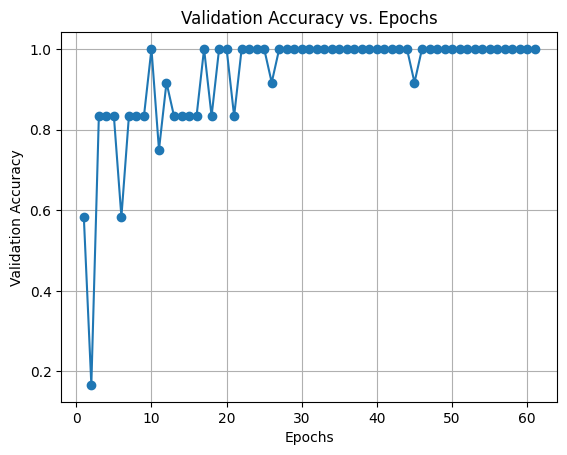

Average number of iterations until convergence: 64.00
Average training set accuracy: 0.9600
Average test set accuracy: 0.9333
Average best validation score: 1.0000


In [ ]:
#Iris with early stopping and validation scores graph

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Parameters as specified
clf_params = {
    'hidden_layer_sizes': [64],
    'activation': 'logistic',
    'solver': 'sgd',
    'alpha': 0,
    'batch_size': 1,
    'learning_rate_init': 0.01,
    'shuffle': True,
    'momentum': 0,
    'n_iter_no_change': 50,
    'max_iter': 1000,
    'early_stopping': True,
    'validation_fraction': 0.1,
    'verbose': 0
}

n_runs = 5  # Number of runs
n_iter_list = []
train_acc_list = []
test_acc_list = []
best_val_score_list = []

for i in range(n_runs):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train the classifier
    clf = MLPClassifier(**clf_params)
    clf.fit(X_train, y_train)

    # Record metrics
    n_iter_list.append(clf.n_iter_)
    train_acc_list.append(clf.score(X_train, y_train))
    test_acc_list.append(clf.score(X_test, y_test))
    best_val_score_list.append(clf.best_validation_score_)

    # For one run, observe the validation accuracy over epochs
    if i == 0:
        epochs = np.arange(1, clf.n_iter_ + 1)
        plt.plot(epochs, clf.validation_scores_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Validation Accuracy')
        plt.title('Validation Accuracy vs. Epochs')
        plt.grid(True)
        plt.show()

# Compute and print average values
print(f"Average number of iterations until convergence: {np.mean(n_iter_list):.2f}")
print(f"Average training set accuracy: {np.mean(train_acc_list):.4f}")
print(f"Average test set accuracy: {np.mean(test_acc_list):.4f}")
print(f"Average best validation score: {np.mean(best_val_score_list):.4f}")

Using a validation set that contains 10% of the training data and early stopping, the given code trains an `MLPClassifier` on the Iris dataset. To calculate average metrics, it does five rounds using various random divides. The model uses one hidden layer with 64 neurons, no regularization (`alpha=0`), and logistic activation. When the validation score doesn't increase after 50 iterations, training is prematurely stopped. The findings indicate that the average convergence occurred after 64 epochs, with a 96% training accuracy and a 93.33% test accuracy. Interestingly, the best validation score averages 100%, meaning that at some point, the validation set is performed flawlessly. The validation accuracy plot shows the performance improvement of the model prior to an early stopping event.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

Results Table:
     alpha  iterations  train_accuracy  test_accuracy  best_loss
0  0.10000         112        0.683333       0.600000   0.878413
1  0.01000         149        0.975000       0.933333   0.351119
2  0.00100         227        0.983333       0.966667   0.096911
3  0.00010         293        0.983333       0.966667   0.045655
4  0.00001         217        0.983333       0.966667   0.042331

Best regularization value (alpha): 0.001


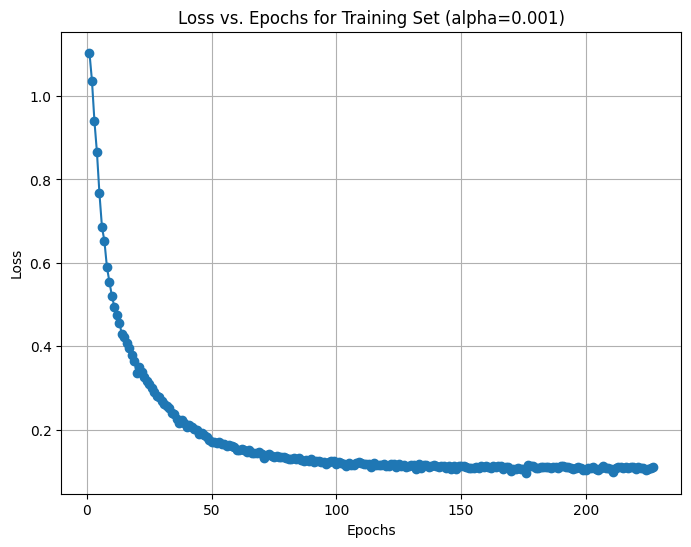

In [ ]:
#Iris with Loss Regularization

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Parameters as specified (excluding early stopping)
common_params = {
    'hidden_layer_sizes': [64],
    'activation': 'logistic',
    'solver': 'sgd',
    'batch_size': 1,
    'learning_rate_init': 0.01,
    'shuffle': True,
    'momentum': 0,
    'n_iter_no_change': 50,
    'max_iter': 1000,
    'verbose': 0
}

# List of alpha values to try
alpha_values = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Initialize lists to store results
results = []

# Split the data once for fair comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Run the model for each alpha value
for alpha in alpha_values:
    # Update the alpha parameter
    clf_params = common_params.copy()
    clf_params['alpha'] = alpha

    # Initialize and train the classifier
    clf = MLPClassifier(**clf_params)
    clf.fit(X_train, y_train)

    # Collect metrics
    n_iter = clf.n_iter_
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    best_loss = clf.best_loss_

    # Append the results
    results.append({
        'alpha': alpha,
        'iterations': n_iter,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'best_loss': best_loss,
        'loss_curve': clf.loss_curve_  # Store loss curve
    })

# Create a table of results
results_df = pd.DataFrame(results)
print("Results Table:")
print(results_df[['alpha', 'iterations', 'train_accuracy', 'test_accuracy', 'best_loss']])

# Determine the best regularization value
best_result = max(results, key=lambda x: x['test_accuracy'])
best_alpha = best_result['alpha']
print(f"\nBest regularization value (alpha): {best_alpha}")

# For the best alpha, plot loss vs. epochs
plt.figure(figsize=(8, 6))
epochs = np.arange(1, len(best_result['loss_curve']) + 1)
plt.plot(epochs, best_result['loss_curve'], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss vs. Epochs for Training Set (alpha={best_alpha})')
plt.grid(True)
plt.show()

Using the Iris dataset, the code trains an `MLPClassifier` to evaluate the effects of L2 loss regularization by experimenting with various alpha values (0.1, 0.01, 0.001, 0.0001, and 0.00001). A consistent train-test split is used to ensure fair comparison. Based on 227 iterations until convergence, the results show that an alpha of 0.001 offers the greatest balance between training accuracy (98.33%) and test accuracy (96.67%). Lower accuracies are a sign of underfitting, which is caused by higher alpha values like 0.1. Effective learning is demonstrated by the best alpha's loss curve, which displays a consistent drop in loss over epochs. This experiment highlights the significance of fine-tuning the regularization value by showing that moderate regularization enhances generalization without requiring an excessive amount of training time.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

The baseline accuracy is directly correlated with the number of classes in each dataset because each target class has the same amount of rows in both datasets. There are three classes for the Iris dataset. Therefore, the baseline accuracy is 1/3 = 33.3%. Since there are 11 classes in the Vowel dataset, the baseline accuracy is 1/11 = 9.1%.

Given that there are more opportunities for error in the vowel dataset than in the Iris dataset, the accuracy of the vowel dataset is likely to be lower. The model needs to be more precise and able to distinguish between additional target classes. Because there were just two incorrect answers in the Iris dataset, the model had less work to do. On the other hand, the Vowel dataset has 10 erroneous answers, so the model will have to learn more and be more comprehensive and exact.

It seems that there is no association between the "Train or Test," "Speaker Number," and "Sex" attributes and the target, based on an analysis of the sweetviz output. Upon closer examination, it appears that every speaker is either a male or a female train or test, with an equal representation of each "Class". Consequently, these three traits do not contribute any pertinent information to the model because they are uncorrelated with the target "Class". As such, their inclusion in the training data is inappropriate.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
# Train with different learning rates

from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Load the Vowel Dataset
vowel_arff = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_arff[0])

# Decode byte strings to regular strings
vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')
vowel_df['Class'] = vowel_df['Class'].str.decode('utf-8')

# Encode 'Sex' feature as 0 (Male) and 1 (Female)
vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})

# Drop irrelevant features
vowel_df = vowel_df.drop(['Train or Test', 'Speaker Number'], axis=1)

# Define feature columns (including 'Sex')
X_columns = ['Sex'] + [f'Feature {i}' for i in range(10)]
X = vowel_df[X_columns]
y = vowel_df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

n_inputs = X_train.shape[1]  # 11 features
n_hidden_units = n_inputs * 2  # 22 hidden nodes

# Define different learning rates to try
learning_rates = [0.001, 0.01, 0.1, 1, 10]

# Store the results
results = []

# Loop over different learning rates
for lr in learning_rates:
    clf = MLPClassifier(
        hidden_layer_sizes=[n_hidden_units],
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=lr,
        shuffle=True,
        momentum=0,
        n_iter_no_change=50,
        max_iter=1000,
        verbose=False,
        random_state=42
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Record the number of epochs, training accuracy, and test accuracy
    n_epochs = clf.n_iter_
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    # Append the results
    results.append({
        'Learning Rate': lr,
        '# Epochs': n_epochs,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

<ipython-input-12-16724ccf0f36>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


   Learning Rate  # Epochs  Training Accuracy  Test Accuracy
0          0.001      1000           0.901617       0.798387
1          0.010       789           1.000000       0.907258
2          0.100       304           1.000000       0.899194
3          1.000       101           0.919137       0.822581
4         10.000       184           0.553908       0.463710


The 'Sex' feature is numerically encoded and superfluous features are removed as part of the preprocessing and loading of the Vowel Dataset. It divides the data into training and test sets using a 75/25 split and applies `StandardScaler` to scale the features. One hidden layer in an MLPClassifier neural network is set up with twice as many input features (22 nodes). Different learning rates, ranging from 0.001 to 10, are used to train the model.

The findings demonstrate that the highest test accuracy (90.7%) in 789 epochs and perfect training accuracy are obtained with a learning rate of 0.01. Extremely high learning rates (e.g., 10) result in subpar performance because of convergence problems, but lower learning rates require more epochs and may underfit. This demonstrates the importance of choosing an appropriate learning rate for optimal model performance.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [ ]:
# Train with different numbers of hidden nodes

# Load the Vowel Dataset
vowel_arff = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_arff[0])

# Decode byte strings to regular strings
vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')
vowel_df['Class'] = vowel_df['Class'].str.decode('utf-8')

# Encode 'Sex' feature as 0 (Male) and 1 (Female)
vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})

# Drop irrelevant features
vowel_df = vowel_df.drop(['Train or Test', 'Speaker Number'], axis=1)

# Define feature columns (including 'Sex')
X_columns = ['Sex'] + [f'Feature {i}' for i in range(10)]
X = vowel_df[X_columns]
y = vowel_df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

# Use the best learning rate found earlier
learning_rate = 0.01

# Store results
results = []

# Define different numbers of hidden nodes to try
hidden_node_counts = [1, 2, 4, 8, 16, 32, 64, 128]

# Loop over different numbers of hidden nodes
for n_hidden_units in hidden_node_counts:
    clf = MLPClassifier(
        hidden_layer_sizes=[n_hidden_units],
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=learning_rate,
        shuffle=True,
        momentum=0,
        n_iter_no_change=50,
        max_iter=1000,
        verbose=False,
        random_state=42
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Record the number of epochs, training accuracy, and test accuracy
    n_epochs = clf.n_iter_
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    # Append the results
    results.append({
        'Hidden Nodes': n_hidden_units,
        '# Epochs': n_epochs,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

    # Check for no improvement in test accuracy
    if len(results) > 1 and test_accuracy <= results[-2]['Test Accuracy']:
        # Stop testing larger networks if no improvement
        break

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

<ipython-input-13-0685245cc2a5>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

   Hidden Nodes  # Epochs  Training Accuracy  Test Accuracy
0             1       662           0.270889       0.225806
1             2       559           0.564690       0.532258
2             4      1000           0.757412       0.661290
3             8      1000           0.893531       0.786290
4            16      1000           1.000000       0.862903
5            32       720           1.000000       0.935484
6            64       621           1.000000       0.939516
7           128       687           1.000000       0.939516


Training and test accuracies both greatly improve as the number of hidden nodes rises from 1 to 128. The model performs poorly with only 1 hidden node (training accuracy ~27%, test accuracy ~ 22%). Gradually improving performance, doubling the nodes results in perfect training accuracy at 16 nodes and a test accuracy of approximately 86%. Test accuracy peaks at about 93.5% at 32 hidden nodes, while increments to 64 and 128 nodes show negligible improvement, suggesting a plateau. After achieving ideal hidden nodes, the number of epochs needed to converge varies but generally reduces, indicating faster learning with a more appropriate network size. This illustrates that adding hidden nodes increases model capacity only so much; beyond that, overfitting could happen without yielding further improvements in test accuracy.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values

# Load the Vowel Dataset
vowel_arff = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_arff[0])

# Decode byte strings to regular strings
vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')
vowel_df['Class'] = vowel_df['Class'].str.decode('utf-8')

# Encode 'Sex' feature as 0 (Male) and 1 (Female)
vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})

# Drop irrelevant features
vowel_df = vowel_df.drop(['Train or Test', 'Speaker Number'], axis=1)

# Define feature columns (including 'Sex')
X_columns = ['Sex'] + [f'Feature {i}' for i in range(10)]
X = vowel_df[X_columns]
y = vowel_df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

# Use the best learning rate and number of hidden nodes from earlier experiments
learning_rate = 0.01
num_hidden_nodes = 64

# Define different momentum values to try
momentum_values = [0, 0.3, 0.6, 0.9, 0.99]

# Store results
results = []

# Loop over different momentum values
for momentum in momentum_values:
    clf = MLPClassifier(
        hidden_layer_sizes=[num_hidden_nodes],
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=learning_rate,
        shuffle=True,
        momentum=momentum,
        n_iter_no_change=50,
        max_iter=1000,
        verbose=False,
        random_state=42
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Record the number of epochs, training accuracy, and test accuracy
    n_epochs = clf.n_iter_
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    # Append the results
    results.append({
        'Momentum': momentum,
        '# Epochs': n_epochs,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

<ipython-input-14-f3f29ea2223b>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df['Sex'] = vowel_df['Sex'].replace({'Male': 0, 'Female': 1})


   Momentum  # Epochs  Training Accuracy  Test Accuracy
0      0.00       621           1.000000       0.939516
1      0.30       519           1.000000       0.943548
2      0.60       375           1.000000       0.951613
3      0.90       197           1.000000       0.959677
4      0.99       162           0.946092       0.875000


The drop in epochs from 621 to 197 indicates that increasing the momentum from 0 to 0.9 greatly shortens training time. This acceleration results from momentum accelerating convergence and assisting the optimizer in overcoming tiny local minima. Up to a momentum of 0.9, training accuracy stays perfect (100%) while test accuracy marginally increases (from roughly 93.95% to 95.97%), suggesting stronger generalization. Nevertheless, training accuracy falls to 94.6% and test accuracy reduces to 87.5% with an extremely high velocity of 0.99. This shows that excessive momentum can cause the optimizer to exceed the ideal weights, leading to inferior performance. Thus, a momentum value of approximately 0.9 provides the optimal trade-off between high accuracy and rapid training.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [ ]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( 0.001, 0.01, 0.1), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [32], [64]),
              'momentum':(0, 0.9, 0.6)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [64], 'learning_rate_init': 0.1, 'momentum': 0}
0.6030303030303031


In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.01, scale=0.1), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [32], [64]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,y)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [64], 'learning_rate_init': 0.08867278012078066, 'momentum': 0.4812915058023757}
0.5979797979797981


The `learning_rate_init`, `hidden_layer_sizes`, `momentum`, and `hidden_layer_sizes` hyperparameters are tested in an exhaustive manner using the grid search. With a best score of almost 0.603, it discovered that the optimal settings were `{'hidden_layer_sizes': [64], 'learning_rate_init': 0.1, and'momentum': 0}`. The randomized search, on the other hand, samples a predetermined number of parameter settings—in this case, 10 iterations—from predetermined distributions. It found an almost identical optimal arrangement, but with a little lower score of roughly 0.598. Randomized search is quicker and covers a wider range of values than grid search, which is comprehensive but takes a long time. While 64 was found to be the ideal hidden layer size by both approaches, more nuanced values for `learning_rate_init` and `momentum` were obtained by randomized search.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

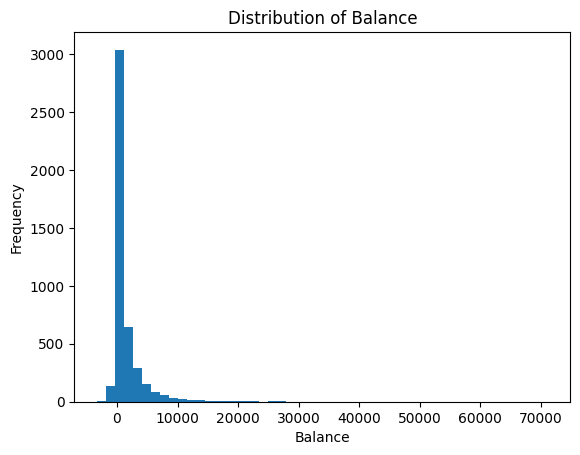

Iteration 1, loss = 0.65665508
Iteration 2, loss = 0.54287376
Iteration 3, loss = 0.50685434
Iteration 4, loss = 0.48994205
Iteration 5, loss = 0.48047100
Iteration 6, loss = 0.47160562
Iteration 7, loss = 0.46497281
Iteration 8, loss = 0.45837982
Iteration 9, loss = 0.45377854
Iteration 10, loss = 0.44878188
Iteration 11, loss = 0.44378116
Iteration 12, loss = 0.44232003
Iteration 13, loss = 0.43719200
Iteration 14, loss = 0.43439908
Iteration 15, loss = 0.43139480
Iteration 16, loss = 0.42653191
Iteration 17, loss = 0.42471671
Iteration 18, loss = 0.42101077
Iteration 19, loss = 0.41964104
Iteration 20, loss = 0.41577352
Iteration 21, loss = 0.41303284
Iteration 22, loss = 0.41185966
Iteration 23, loss = 0.40974522
Iteration 24, loss = 0.40676032
Iteration 25, loss = 0.40360708
Iteration 26, loss = 0.40152040
Iteration 27, loss = 0.40157042
Iteration 28, loss = 0.40039809
Iteration 29, loss = 0.39567719
Iteration 30, loss = 0.39339151
Iteration 31, loss = 0.39046483
Iteration 32, los

In [ ]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

# Load the Bank Dataset
bank_df = pd.read_csv('bank.csv', sep=';')

# Select the target variable 'balance' for regression
# Drop the original target 'y' as it's not needed
bank_df = bank_df.drop('y', axis=1)

# Examine the distribution of 'balance'
plt.hist(bank_df['balance'], bins=50)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Handle outliers by capping the 'balance' at the 99th percentile
balance_cap = bank_df['balance'].quantile(0.99)
bank_df['balance'] = np.where(bank_df['balance'] > balance_cap, balance_cap, bank_df['balance'])

# Identify categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome']
numerical_columns = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

# One-hot encode categorical features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(bank_df[categorical_columns])
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)
bank_ohe = pd.DataFrame(ohe.transform(bank_df[categorical_columns]), columns=ohe_feature_names)

# Combine numerical features and one-hot encoded features
bank_numeric = bank_df[numerical_columns + ['balance']].reset_index(drop=True)
bank_processed = pd.concat([bank_numeric, bank_ohe], axis=1)

# Separate features and target variable
X = bank_processed.drop('balance', axis=1)
y = bank_processed['balance']

# Normalize input features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize and train the MLPRegressor with increased max_iter
regressor = MLPRegressor(
    hidden_layer_sizes=[64],
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,  # Increased from 500 to 1000
    random_state=42,
    verbose=True
)
regressor.fit(X_train, y_train)

# Predict and calculate MAE for training and test sets
y_train_pred_scaled = regressor.predict(X_train)
y_test_pred_scaled = regressor.predict(X_test)

# Inverse transform the scaled predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Compute MAE
train_mae = mean_absolute_error(scaler_y.inverse_transform(y_train.reshape(-1,1)), y_train_pred)
test_mae = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1,1)), y_test_pred)

print(f"Training MAE: €{train_mae:.2f}")
print(f"Test MAE: €{test_mae:.2f}")

Using an `MLPRegressor`, the algorithm aims to predict the "balance" in the bank dataset. In order to manage outliers, it preprocesses the data by capping the "balance" at the 99th percentile and using one-hot encoding for categorical variables. `StandardScaler` is used to standardize the target variable as well as the input features. The neural network is trained for a maximum of 1,000 iterations using a single hidden layer with 64 neurons.

Despite these efforts, the training MAE is roughly €1,028, while the test MAE is around €1,949, showing poor generalization and likely overfitting. The model may not be adequately reflecting the underlying patterns, as indicated by the high MAE values. In order to enhance outcomes, contemplate conducting further feature engineering, modifying hyperparameters, or investigating substitute models such as ensemble approaches or linear regression.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

# Load the Bank Dataset
bank_df = pd.read_csv('bank.csv', sep=';')

# Drop the original target 'y' and select 'balance' as the target variable
bank_df = bank_df.drop('y', axis=1)

# Handle outliers by capping 'balance' at the 99th percentile
balance_cap = bank_df['balance'].quantile(0.99)
bank_df['balance'] = np.where(bank_df['balance'] > balance_cap, balance_cap, bank_df['balance'])

# Identify categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome']
numerical_columns = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

# One-hot encode categorical features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bank_ohe = pd.DataFrame(ohe.fit_transform(bank_df[categorical_columns]),
                        columns=ohe.get_feature_names_out(categorical_columns))

# Combine numerical features and one-hot encoded features
bank_numeric = bank_df[numerical_columns + ['balance']].reset_index(drop=True)
bank_processed = pd.concat([bank_numeric, bank_ohe], axis=1)

# Separate features and target variable
X = bank_processed.drop('balance', axis=1)
y = bank_processed['balance']

# Normalize input features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

# Function to train the model and record MAE
def train_evaluate_model(hidden_layers, activation_func):
    regressor = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation=activation_func,
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        verbose=False
    )
    regressor.fit(X_train, y_train)

    # Reshape predictions to 2D arrays before inverse transforming
    y_train_pred_scaled = regressor.predict(X_train).reshape(-1, 1)
    y_test_pred_scaled = regressor.predict(X_test).reshape(-1, 1)

    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).ravel()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled).ravel()

    y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    train_mae = mean_absolute_error(y_train_actual, y_train_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    return train_mae, test_mae

# Experiment with different activation functions
activation_functions = ['logistic', 'tanh', 'relu']
results_activation = []

for activation in activation_functions:
    train_mae, test_mae = train_evaluate_model([64], activation)
    results_activation.append({
        'Activation Function': activation,
        'Training MAE': train_mae,
        'Test MAE': test_mae
    })

results_activation_df = pd.DataFrame(results_activation)
print("Results for Different Activation Functions:")
print(results_activation_df)

# Experiment with multiple hidden layers
hidden_layer_configs = [[64], [64, 32], [64, 32, 16]]
results_hidden_layers = []

for layers in hidden_layer_configs:
    train_mae, test_mae = train_evaluate_model(layers, 'relu')
    results_hidden_layers.append({
        'Hidden Layers': layers,
        'Training MAE': train_mae,
        'Test MAE': test_mae
    })

results_hidden_layers_df = pd.DataFrame(results_hidden_layers)
print("\nResults for Different Hidden Layer Configurations:")
print(results_hidden_layers_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Results for Different Activation Functions:
  Activation Function  Training MAE     Test MAE
0            logistic    811.734339  2151.865917
1                tanh    740.972690  2407.244275
2                relu   1028.226186  1949.379520

Results for Different Hidden Layer Configurations:
  Hidden Layers  Training MAE     Test MAE
0          [64]   1028.226186  1949.379520
1      [64, 32]    740.974662  2272.912131
2  [64, 32, 16]    672.302068  1850.445485


In order to run regression on the 'balance' variable using an MLPRegressor neural network, the code fetches the Bank dataset. The method employs a one-hot encoding technique for categorical features, caps 'balance' at the 99th percentile to manage outliers, and scales both the target variable and features. The model explores with various hidden layer configurations ([64], [64, 32], [64, 32, 16]) and activation functions ('logistic', 'tanh','relu') to assess their effect on performance.

The findings indicate that when compared to "logistic" and "tanh," the "relu" activation function with a single hidden layer produces a higher training MAE (1028) but a lower test MAE (1949). The training MAE decreases with the number of hidden layers; it reaches its lowest value of 672 with three layers; however, the test MAE does not increase correspondingly, suggesting that overfitting may have occurred. The best test MAE (1850) suggests that while deeper networks can capture more complexity, they may not generalize better.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

On the Iris dataset, scikit-learn's MLPClassifier obtained 100% accuracy, compared to the custom MLP's 68% test accuracy. This disparity most likely results from variations in optimization strategies and implementation specifics. Advanced features including adaptive learning rates, sophisticated weight initialization, and regularization techniques are all included in Scikit-learn's MLPClassifier, and they significantly improve convergence and generalization. Furthermore, the custome MLP may have drawbacks like inadequate training epochs, inadequate weight updates, or missing features like weight decay and early halting. Furthermore, the use of efficient algorithms and well optimized numerical stability is advantageous in the scikit-learn implementation. These elements support the superior performance of scikit-learn, underscoring the difficulties in reproducing intricate algorithms and the significance of careful execution in neural network training.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

class MLP(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.1, momentum=0, shuffle=True, hidden_layer_widths=None, n_epochs=1000):
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle
        self.hidden_layer_widths = hidden_layer_widths
        self.n_epochs = n_epochs
        self.activation_function = self._sigmoid
        self.activation_derivative = self._sigmoid_derivative

    def fit(self, X, y, initial_weights=None):
        n_samples, n_features = X.shape
        n_outputs = len(np.unique(y))

        # One-hot encode the targets
        lb = LabelBinarizer()
        y_encoded = lb.fit_transform(y)
        self.classes_ = lb.classes_

        # Define neural network architecture
        layer_sizes = [n_features] + (self.hidden_layer_widths or [n_features * 2]) + [n_outputs]

        # Initialize weights
        self.weights = self.initialize_weights(layer_sizes) if initial_weights is None else initial_weights
        weight_updates = [np.zeros_like(w[:-1]) for w in self.weights]
        bias_updates = [np.zeros_like(w[-1]) for w in self.weights]

        for epoch in range(self.n_epochs):
            if self.shuffle:
                X, y_encoded = shuffle(X, y_encoded, random_state=epoch)

            for xi, target in zip(X, y_encoded):
                # Forward pass
                activations = [xi]
                inputs = []
                for w in self.weights:
                    net_input = np.dot(activations[-1], w[:-1]) + w[-1]  # Separate bias
                    inputs.append(net_input)
                    activation = self.activation_function(net_input)
                    activations.append(activation)

                # Compute error (delta) at output layer
                error = activations[-1] - target
                deltas = [error * self.activation_derivative(inputs[-1])]

                # Backward pass
                for i in reversed(range(len(self.weights) - 1)):
                    delta = np.dot(deltas[0], self.weights[i + 1][:-1].T) * self.activation_derivative(inputs[i])
                    deltas.insert(0, delta)

                # Update weights
                for i in range(len(self.weights)):
                    a = np.atleast_2d(activations[i])
                    delta = np.atleast_2d(deltas[i])

                    # Separate weight and bias updates
                    weight_update = -self.lr * np.dot(a.T, delta)
                    bias_update = -self.lr * delta.flatten()

                    # Apply momentum
                    weight_updates[i] = self.momentum * weight_updates[i] + weight_update
                    bias_updates[i] = self.momentum * bias_updates[i] + bias_update

                    # Update weights and biases
                    self.weights[i][:-1] += weight_updates[i]  # Update weights
                    self.weights[i][-1] += bias_updates[i]     # Update biases

        return self

    def predict(self, X):
        y_pred = []
        for xi in X:
            activation = xi
            for w in self.weights:
                net_input = np.dot(activation, w[:-1]) + w[-1]
                activation = self.activation_function(net_input)
            y_pred.append(np.argmax(activation))
        return self.classes_[y_pred]

    def initialize_weights(self, layer_sizes):
        weights = []
        for i in range(len(layer_sizes) - 1):
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i + 1]))
            w = np.random.uniform(-limit, limit, (layer_sizes[i] + 1, layer_sizes[i + 1]))  # +1 for bias
            weights.append(w)
        return weights

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def get_weights(self):
        return self.weights

    # Activation functions
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def _sigmoid_derivative(x):
        s = 1 / (1 + np.exp(-x))
        return s * (1 - s)


In [ ]:
# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train custom MLP
custom_mlp = MLP(lr=0.1, momentum=0.9, shuffle=True, hidden_layer_widths=[10], n_epochs=1000)
custom_mlp.fit(X_train, y_train)
custom_accuracy = custom_mlp.score(X_test, y_test)
print(f"Custom MLP Test Accuracy: {custom_accuracy:.2f}")

# Compare with scikit-learn's MLPClassifier
from sklearn.neural_network import MLPClassifier

sklearn_mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd',
                            learning_rate_init=0.1, momentum=0.9, max_iter=1000, random_state=42)
sklearn_mlp.fit(X_train, y_train)
sklearn_accuracy = sklearn_mlp.score(X_test, y_test)
print(f"Sklearn MLPClassifier Test Accuracy: {sklearn_accuracy:.2f}")


Custom MLP Test Accuracy: 0.68
Sklearn MLPClassifier Test Accuracy: 1.00
